Het voorspellen van de bondprijs alleen op basis van historische waarde van de bond is waarschijnlijk nooit erg succesvol. Voor een betere voorspelling zullen we 'leading indicatoren' moeten hebben. Indicatoren die iets zeggen waar de markt naar toe gaat.

Voor dit onderzoek richt ik mij op een drietal indicatoren:
    - Remaining Duration
	- Theoretical Bond Prices
	- Inflation curve

Remaining duration is eenvoudig. Bij het inlezen van de bondprijzen heb ik dit al bepaald - eenvoudig door de rate date af te trekken van de bond maturity. We zagen in de data exploratie dat de remaining duration vooral in de laatste jaren van de bond een rol speelt bij de prijsbepaling. 

In [4]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

if IS_COLAB:
    !git clone https://github.com/Merijn68/BondTrading.git    
    %pip install -q "ray[tune]" bayesian-optimization
    %pip install loguru tensorflow-addons
    %cd BondTrading

In [27]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "..")

import math
from src.data import make_dataset
from src.visualization import visualize
from pathlib import Path
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
if IS_COLAB:
    df_bonds = make_dataset.get_bond_data(path = Path("data/raw/price.csv"))
    df_bonds = make_dataset.impute_bonds(df_bonds)
    df_price = make_dataset.get_price(path = Path("data/raw/price.csv"))
    df_price = make_dataset.impute_price(df_price)
    df_bp = make_dataset.join_price(df_bonds,df_price )
    df_bp = make_dataset.build_features.add_duration(df_bp)
else:
    df_bp = make_dataset.read_pkl('bp', path = Path("data/processed/")) 
   
isin = "NL0011220108" # 10 Years NL Bond, maturity 2025 0.25% coupon
df_isin = df_bp[df_bp['reference_identifier'] == isin]
df_isin = df_isin.set_index('rate_dt')
df_isin = df_isin.sort_index()
df_isin = df_isin[['mid','remain_duration']]

2022-01-23 13:05:20.223 | INFO     | src.data.make_dataset:read_pkl:383 - Load preprocessed bp data


In [53]:
split = math.floor(len(series) * .70)

# Train test split
train = df_isin[:split]
test = df_isin[split:]
tmin = train.min()
tmax = train.max()
train=(train-tmin)/(tmax-tmin)
test =(test- tmin)/(tmax-tmin)

<AxesSubplot:xlabel='rate_dt'>

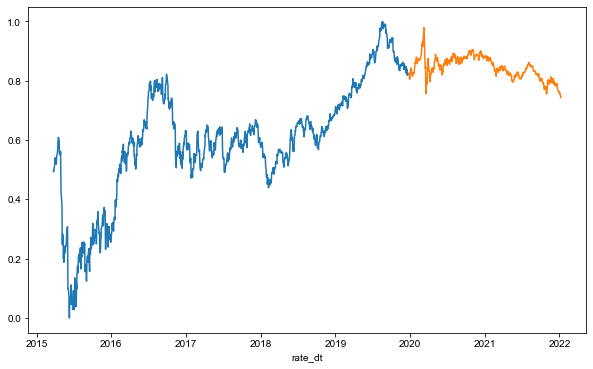

In [55]:
visualize.timeplot(train['mid'], test['mid'], figurepath = Path("reports/figures"), name = 'timeseries traintestsplit')